# 53 Adding anthropogenic geometries to PyVista

Geological models are often constructed for the purpose of tunneling or any other type of excavation. As such a tunnel is not a geological but rather anthropegnic feature, it is desirable to visualize the planned or the actual path of the tunnel into the model.

<img src="../images/tutorial53_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [2]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/53_adding_anthropogenic_geometries_to_pyvista/'

## Load Layer Data

The example model will be loaded and a tunnel will be defined to cross the layers later on.

In [3]:
import gemgis as gg
import pyvista as pv

mesh1 = pv.read(file_path+'Layer1.vtk')
mesh2 = pv.read(file_path+'Layer2.vtk')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
mesh1

PolyData (0x1e0f5d149a0)
  N Cells:	4174
  N Points:	2303
  X Bounds:	9.720e+00, 9.623e+02
  Y Bounds:	1.881e+02, 9.491e+02
  Z Bounds:	3.050e+02, 7.250e+02
  N Arrays:	1

In [5]:
mesh2

PolyData (0x1e0f5d14a00)
  N Cells:	5111
  N Points:	2739
  X Bounds:	9.720e+00, 9.623e+02
  Y Bounds:	3.578e+02, 1.058e+03
  Z Bounds:	3.050e+02, 7.265e+02
  N Arrays:	1

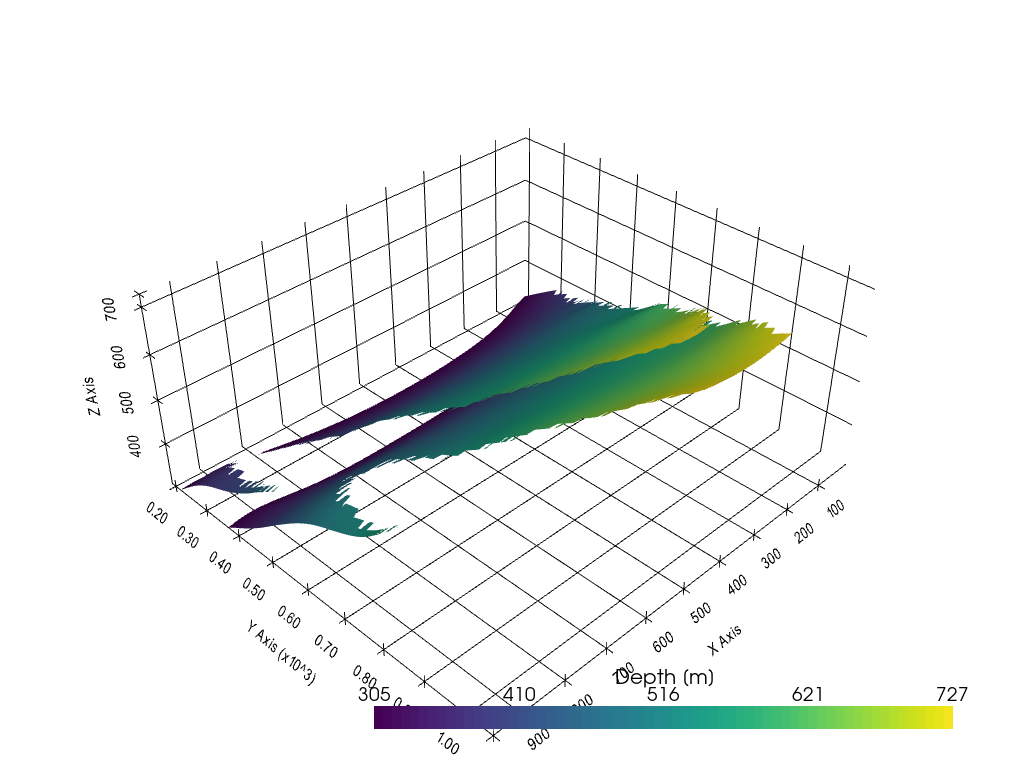

In [7]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh1, scalars= 'Depth [m]', scalar_bar_args=sargs)
p.add_mesh(mesh2, scalars= 'Depth [m]', scalar_bar_args=sargs)

p.set_background('white')
p.show_grid(color='black')
p.show()

## Defining Tunnel Object

The tunnel object will be created as tube from a line. 

In [30]:
import numpy as np

points = np.array([[200,1000,400],
                [300,800,500],
                [700,600,400],
                [900,200,400]])
points

array([[ 200, 1000,  400],
       [ 300,  800,  500],
       [ 700,  600,  400],
       [ 900,  200,  400]])

In [31]:
poly = pv.PolyData(points)
poly.points = points
the_cell = np.arange(0, len(points), dtype=np.int_)
the_cell = np.insert(the_cell, 0, len(points))
poly.lines = the_cell
poly

PolyData,Information
N Cells,5
N Points,4
X Bounds,"2.000e+02, 9.000e+02"
Y Bounds,"2.000e+02, 1.000e+03"
Z Bounds,"4.000e+02, 5.000e+02"
N Arrays,0


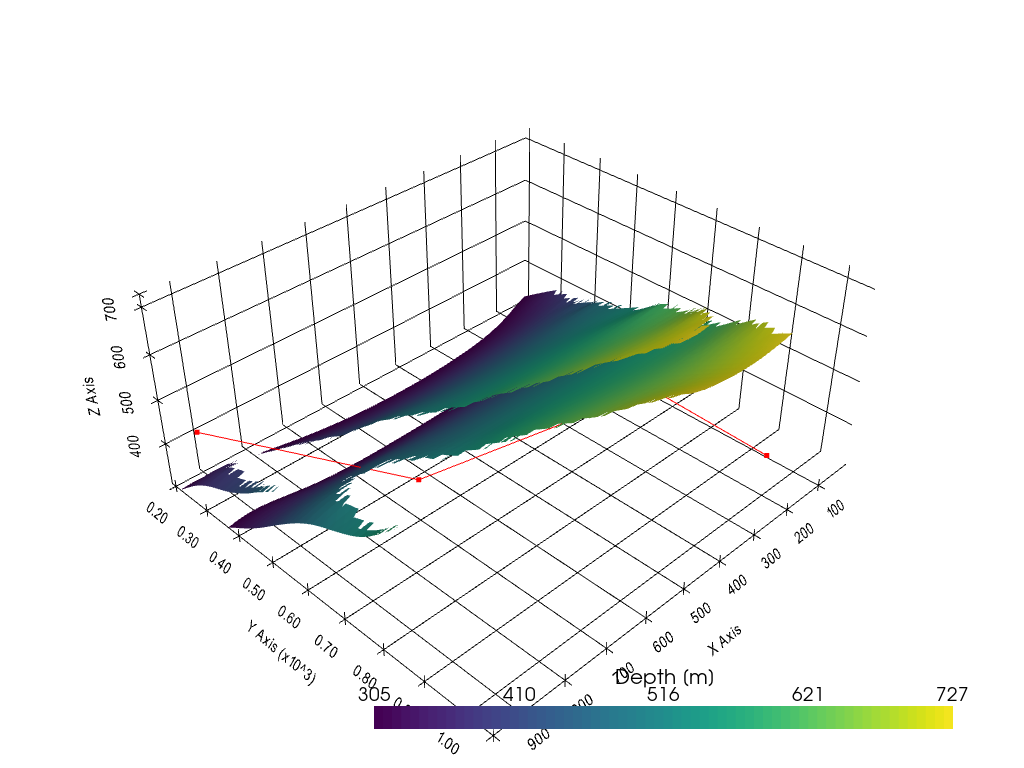

In [32]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh1, scalars= 'Depth [m]', scalar_bar_args=sargs)
p.add_mesh(mesh2, scalars= 'Depth [m]', scalar_bar_args=sargs)
p.add_mesh(poly, color='red')

p.set_background('white')
p.show_grid(color='black')
p.show()

In [35]:
poly['scalars'] = np.arange(len(points))
tube = poly.tube(radius=50)

tube

PolyData (0x1e08029b700)
  N Cells:	22
  N Points:	120
  X Bounds:	1.540e+02, 9.440e+02
  Y Bounds:	1.770e+02, 1.028e+03
  Z Bounds:	3.500e+02, 5.490e+02
  N Arrays:	2

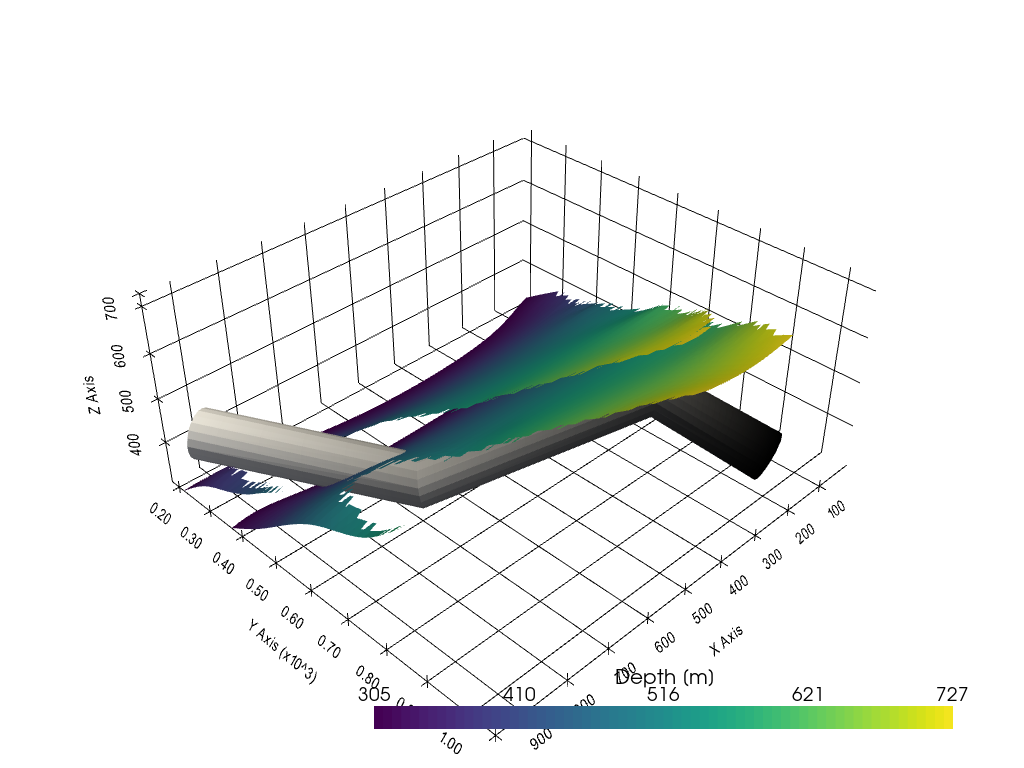

In [41]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh1, scalars= 'Depth [m]', scalar_bar_args=sargs)
p.add_mesh(mesh2, scalars= 'Depth [m]', scalar_bar_args=sargs)
p.add_mesh(poly, color='red')
p.add_mesh(tube, show_scalar_bar=False, cmap='gray')

p.set_background('white')
p.show_grid(color='black')
p.show()